In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


1. **Importing Necessary Packages**

In [2]:
# Importing the scipy.io module for reading and writing MATLAB files
import scipy.io

# Importing the numpy library for numerical operations
import numpy as np

# Importing train_test_split and KFold from scikit-learn for data splitting
from sklearn.model_selection import train_test_split, KFold

# Importing confusion_matrix from scikit-learn for evaluating model performance
from sklearn.metrics import confusion_matrix

# Importing TensorFlow for deep learning capabilities
import tensorflow as tf

# Importing specific modules and classes from TensorFlow and Keras for building neural networks
from tensorflow.keras import layers, models

# Importing the pyplot module from matplotlib for data visualization
import matplotlib.pyplot as plt

# Importing the seaborn library for statistical data visualization
import seaborn as sns

# Importing the pandas library for data manipulation and analysis
import pandas as pd


2. **Overview of Downloaded Files**

In [3]:
# Load data from a MATLAB file using scipy.io
# The file '99.mat' is located in the specified Google Drive path
demo_data = scipy.io.loadmat('/content/drive/MyDrive/EMdata/DATA1/Drive_end_2/99.mat')

# Print the keys present in the loaded MATLAB file
# These keys represent variable names or data structures stored in the file
print(demo_data.keys())

# Access and print the shape of a specific variable ('X099_DE_time') from the loaded data
# This provides an overview of the dimensions of the data contained in the variable
X99_normal = demo_data['X099_DE_time']

print("\nShape of 'X099_DE_time':", X99_normal.shape)


dict_keys(['__header__', '__version__', '__globals__', 'ans', 'X098_DE_time', 'X098_FE_time', 'X099_DE_time', 'X099_FE_time'])

Shape of 'X099_DE_time': (485063, 1)


In [4]:
def ImportFiles():
  # Load data for the normal state of the machine from the MATLAB file '99.mat'
  X99_normal = scipy.io.loadmat('/content/drive/MyDrive/EMdata/DATA1/Drive_end_2/99.mat')['X099_DE_time']

  # Load data for Inner Race Fault at 007 RPM from the MATLAB file '111.mat'
  X111_InnerRace_007 = scipy.io.loadmat('/content/drive/MyDrive/EMdata/DATA1/Drive_end_2/111.mat')['X111_DE_time']

  # Load data for Ball Fault at 007 RPM from the MATLAB file '124.mat'
  X124_Ball_007 = scipy.io.loadmat('/content/drive/MyDrive/EMdata/DATA1/Drive_end_2/124.mat')['X124_DE_time']

  # Load data for Outer Race Fault at 007 RPM from the MATLAB file '137.mat'
  X137_Outer_007 = scipy.io.loadmat('/content/drive/MyDrive/EMdata/DATA1/Drive_end_2/137.mat')['X137_DE_time']

  # Load data for Inner Race Fault at 014 RPM from the MATLAB file '176.mat'
  X176_InnerRace_014 = scipy.io.loadmat('/content/drive/MyDrive/EMdata/DATA1/Drive_end_2/176.mat')['X176_DE_time']

  # Load data for Ball Fault at 014 RPM from the MATLAB file '191.mat'
  X191_Ball_014 = scipy.io.loadmat('/content/drive/MyDrive/EMdata/DATA1/Drive_end_2/191.mat')['X191_DE_time']

  # Load data for Outer Race Fault at 014 RPM from the MATLAB file '203.mat'
  X203_Outer_014 = scipy.io.loadmat('/content/drive/MyDrive/EMdata/DATA1/Drive_end_2/203.mat')['X203_DE_time']

  # Load data for Inner Race Fault at 021 RPM from the MATLAB file '215.mat'
  X215_InnerRace_021 = scipy.io.loadmat('/content/drive/MyDrive/EMdata/DATA1/Drive_end_2/215.mat')['X215_DE_time']

  # Load data for Ball Fault at 021 RPM from the MATLAB file '228.mat'
  X228_Ball_021 = scipy.io.loadmat('/content/drive/MyDrive/EMdata/DATA1/Drive_end_2/228.mat')['X228_DE_time']

  # Load data for Outer Race Fault at 021 RPM from the MATLAB file '240.mat'
  X240_Outer_021 = scipy.io.loadmat('/content/drive/MyDrive/EMdata/DATA1/Drive_end_2/240.mat')['X240_DE_time']

  # Return a list containing the loaded data for different machine states
  return [X99_normal, X111_InnerRace_007, X124_Ball_007, X137_Outer_007, X176_InnerRace_014, X191_Ball_014, X203_Outer_014, X215_InnerRace_021, X228_Ball_021, X240_Outer_021]


 """
    Function to sample blocks of data from a given time series.

    Parameters:
    - Data: Time series data to be sampled.
    - interval_length: Length of each interval to be sampled.
    - samples_per_block: Number of samples to be collected in each block.

    Returns:
    - SplitData: 2D array containing sampled blocks of data.
    """

In [5]:
def Sampling(Data, interval_length, samples_per_block):

    # Calculate the number of blocks that can be sampled based on the interval length
    No_of_blocks = (round(len(Data) / interval_length) - round(samples_per_block / interval_length) - 1)
    SplitData = np.zeros([No_of_blocks, samples_per_block])

    # Sample blocks from the time series data
    for i in range(No_of_blocks):
        SplitData[i, :] = (Data[i * interval_length:(i * interval_length) + samples_per_block]).T

    return SplitData

  """
    Function to prepare data for training a model.

    Parameters:
    - Data: List of time series data for different machine states.
    - interval_length: Length of each interval to be sampled.
    - samples_per_block: Number of samples to be collected in each block.

    Returns:
    - X: 2D array containing the sampled data.
    - LabelPositional: 2D array representing one-hot encoding of the classes.
    - Label: 2D array representing the classes directly.
    """

In [6]:
def DataPreparation(Data, interval_length, samples_per_block):

    for count, i in enumerate(Data):
        SplitData = Sampling(i, interval_length, samples_per_block)

        # Initialize label arrays
        y = np.zeros([len(SplitData), 10])
        y[:, count] = 1
        y1 = np.zeros([len(SplitData), 1])
        y1[:, 0] = count

        # Stack up and label the data
        if count == 0:
            X = SplitData
            LabelPositional = y
            Label = y1
        else:
            X = np.append(X, SplitData, axis=0)
            LabelPositional = np.append(LabelPositional, y, axis=0)
            Label = np.append(Label, y1, axis=0)

    return X, LabelPositional, Label


# Importing the Required Columns from the Uploaded .mat Files
Data = ImportFiles()

# Set the parameters for data preparation
interval_length = 200
samples_per_block = 1681

# Prepare the data for training a model
X, Y_CNN, Y = DataPreparation(Data, interval_length, samples_per_block)

Optional:  Downloading the Preprocessed Data

In [7]:
XX = {'X':X}
scipy.io.savemat('Data.mat', XX)

In [8]:
# k-fold cross validation
kSplits = 5
kfold = KFold(n_splits=kSplits, random_state=32, shuffle=True)

In [14]:
# Reshape the data - 1 dimensional feed
Input = X.reshape([-1,1681,1])

# Reshape the data - 1 dimensional feed
print('Before Preprocessing: ')
print('\t Shape of Input X =', X.shape)
Input = X.reshape([-1,1681,1])
print('\t Shape of Input_1D =', Input.shape)

# Test-Train Split
X_train, X_test, y_train, y_test = train_test_split(Input, Y_CNN, train_size=0.75,test_size=0.25, random_state=101)
print('\n\nAfter Preprocessing: ')
print('\tShape of X_train =', X_train.shape)
print('\tShape of y_train =', y_train.shape)

print('\n\tShape of X_test =', X_test.shape)
print('\tShape of y_test =', y_test.shape)



Before Preprocessing: 
	 Shape of Input X = (24276, 1681)
	 Shape of Input_1D = (24276, 1681, 1)


After Preprocessing: 
	Shape of X_train = (18207, 1681, 1)
	Shape of y_train = (18207, 10)

	Shape of X_test = (6069, 1681, 1)
	Shape of y_test = (6069, 10)


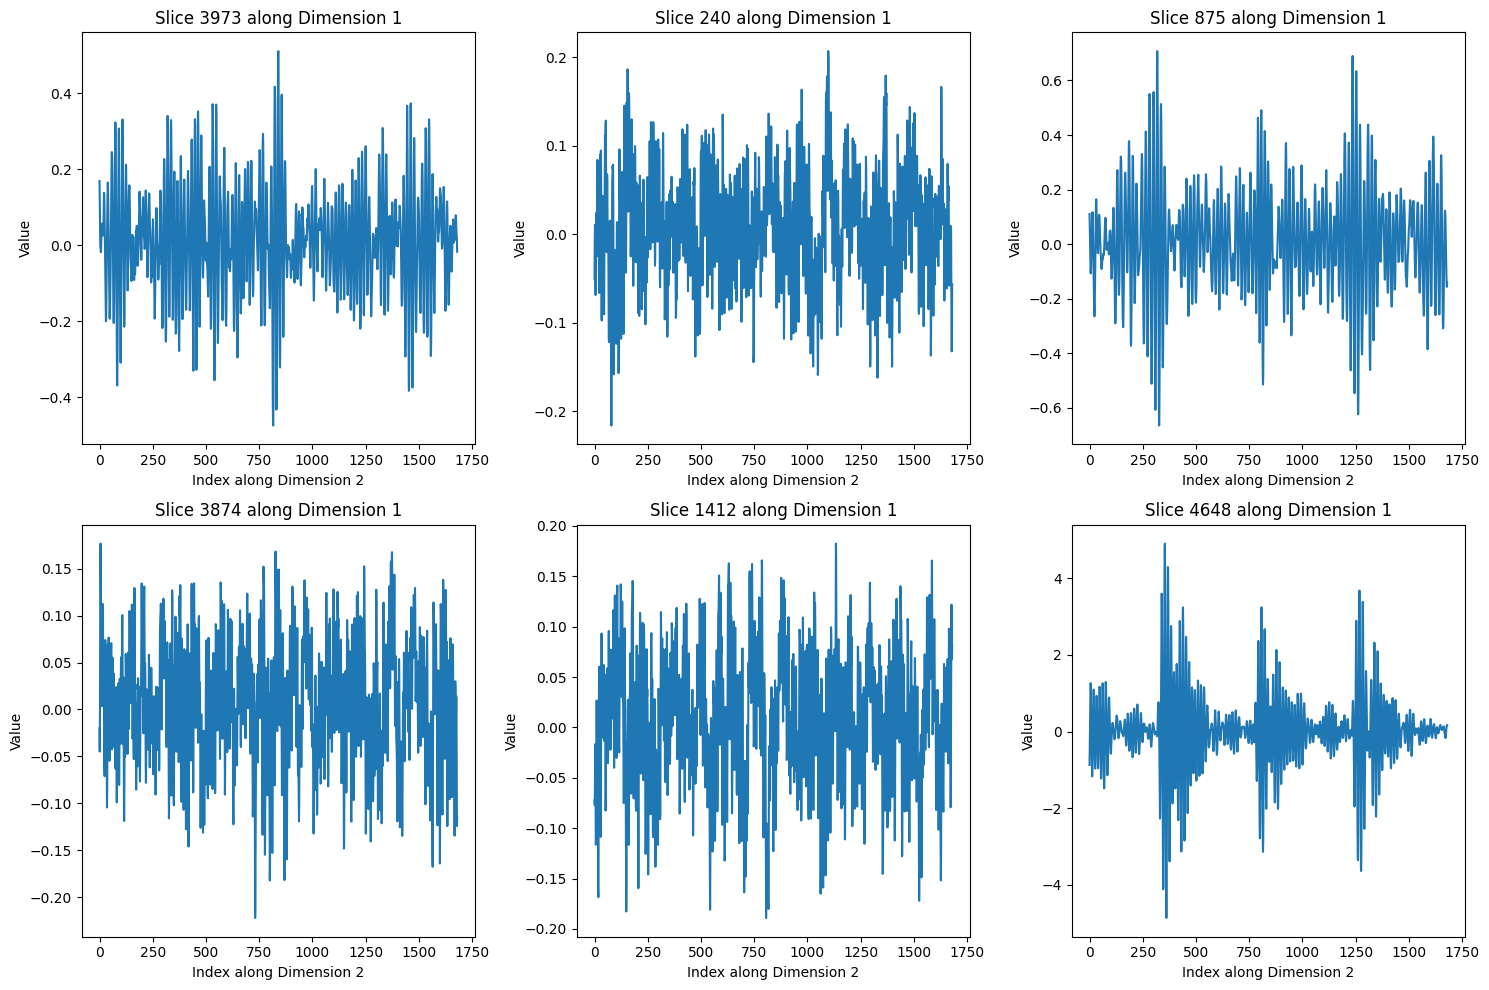

In [12]:
# Assuming your data is a numpy array
random_indices = np.random.choice(range( X_1D_test.shape[0]), size=1680, replace=False)

# Create subplots
fig, axes = plt.subplots(2, 3, figsize=(15, 10))

for i, ax in zip(random_indices, axes.flatten()):
    ax.plot( X_1D_test[i, :, 0])
    ax.set_title(f'Slice {i} along Dimension 1')
    ax.set_xlabel('Index along Dimension 2')
    ax.set_ylabel('Value')

plt.tight_layout()
plt.show()


In [13]:
# Define the LSTM Classification model
class LSTM_Model():
  def __init__(self):
    self.model = self.CreateModel()

  def CreateModel(self):
    model = models.Sequential([
        layers.LSTM(32, return_sequences=True),
        layers.Flatten(),
        layers.Dense(10),
        layers.Softmax()
        ])
    model.compile(optimizer='adam',
              loss=tf.keras.losses.CategoricalCrossentropy(),
              metrics=['accuracy'])
    return model


accuracy = []

# Train the model
for train, test in kfold.split(X_train,y_train):
  Classification = LSTM_Model()
  history = Classification.model.fit(X_train[train], y_train[train], verbose=1, epochs=10, use_multiprocessing=True)

  # Evaluate the accuracy of the model on the training set
  kf_loss, kf_accuracy = Classification.model.evaluate(X_train[test], y_train[test])
  accuracy.append(kf_accuracy)

LSTM_train_accuracy = np.average(accuracy)*100
print('LSTM train accuracy =', LSTM_train_accuracy)


# Evaluate the accuracy of the model on the test set
LSTM_test_loss, LSTM_test_accuracy = Classification.model.evaluate(X_test, y_test)
LSTM_test_accuracy*=100
print('LSTM test accuracy =', LSTM_test_accuracy)

Epoch 1/10
456/456 [==============================] - 192s 418ms/step - loss: 1.1889 - accuracy: 0.5688
Epoch 2/10
456/456 [==============================] - 167s 366ms/step - loss: 0.3981 - accuracy: 0.8592
Epoch 3/10
456/456 [==============================] - 165s 363ms/step - loss: 0.2631 - accuracy: 0.9071
Epoch 4/10
456/456 [==============================] - 165s 362ms/step - loss: 0.2206 - accuracy: 0.9213
Epoch 5/10
456/456 [==============================] - 165s 362ms/step - loss: 0.2013 - accuracy: 0.9320
Epoch 6/10
456/456 [==============================] - 163s 357ms/step - loss: 0.1603 - accuracy: 0.9438
Epoch 7/10
456/456 [==============================] - 162s 355ms/step - loss: 0.1562 - accuracy: 0.9491
Epoch 8/10
456/456 [==============================] - 163s 358ms/step - loss: 0.1394 - accuracy: 0.9563
Epoch 9/10
456/456 [==============================] - 162s 356ms/step - loss: 0.1120 - accuracy: 0.9636
Epoch 10/10
114/114 [==============================] - 10s 81ms/

**Testing Data Accuracy**

In [15]:
def ConfusionMatrix(Model, X, y):
  y_pred = np.argmax(Model.model.predict(X), axis=1)
  ConfusionMat = confusion_matrix(np.argmax(y, axis=1), y_pred)
  return ConfusionMat

569/569 [==============================] - 51s 90ms/step


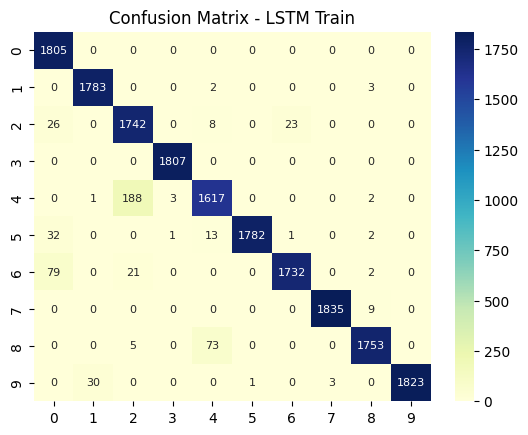

190/190 [==============================] - 17s 87ms/step


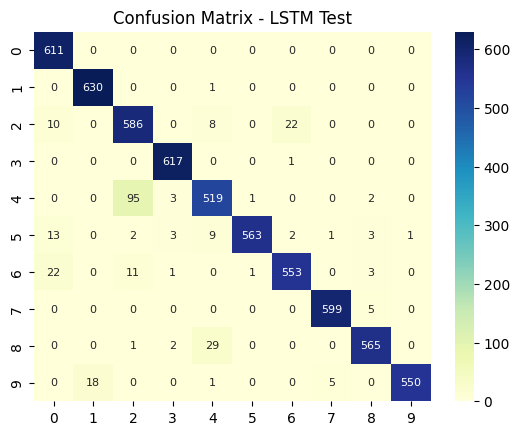

In [17]:
plt.figure(1)
plt.title('Confusion Matrix - LSTM Train')
sns.heatmap(ConfusionMatrix(Classification, X_1D_train, y_1D_train) , annot=True, fmt='d',annot_kws={"fontsize":8},cmap="YlGnBu")
plt.show()

plt.figure(2)
plt.title('Confusion Matrix - LSTM Test')
sns.heatmap(ConfusionMatrix(Classification, X_1D_test, y_1D_test) , annot=True, fmt='d',annot_kws={"fontsize":8},cmap="YlGnBu")
plt.show()

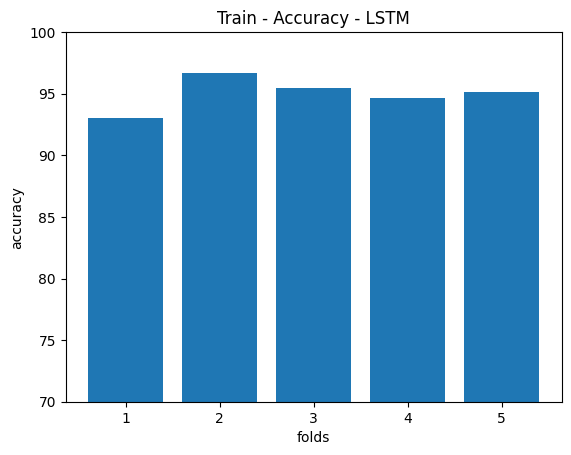

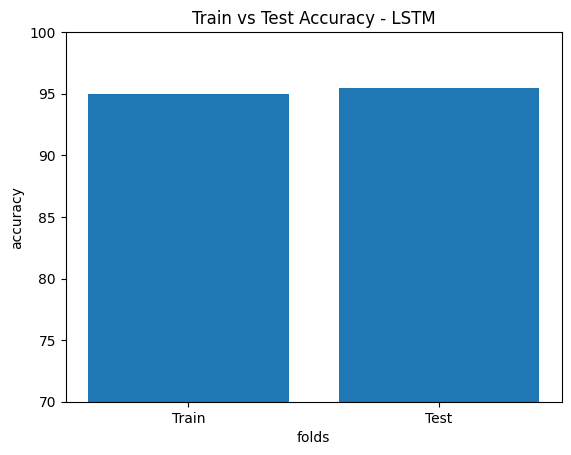

In [18]:
plt.figure(1)
plt.title('Train - Accuracy - LSTM')
plt.bar(np.arange(1,kSplits+1),[i*100 for i in accuracy])
plt.ylabel('accuracy')
plt.xlabel('folds')
plt.ylim([70,100])
plt.show()

plt.figure(2)
plt.title('Train vs Test Accuracy - LSTM')
plt.bar([1,2],[LSTM_train_accuracy,LSTM_test_accuracy])
plt.ylabel('accuracy')
plt.xlabel('folds')
plt.xticks([1,2],['Train', 'Test'])
plt.ylim([70,100])
plt.show()

**Simulated Test Data**

**Error Data**

In [19]:
test = scipy.io.loadmat('/content/drive/MyDrive/EMdata/DATA1/yourmatfilef.mat')['c']
print(test.shape)

(8971, 1)


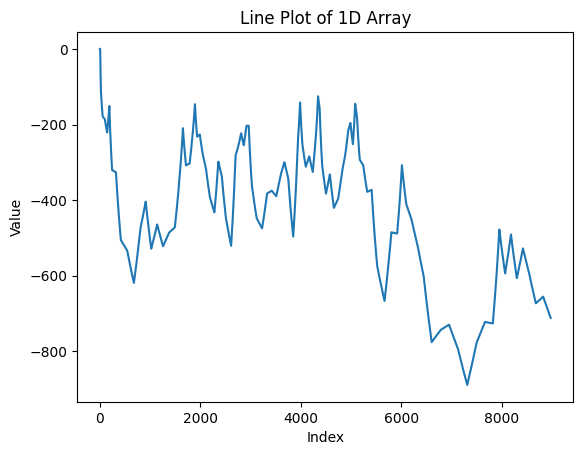

In [20]:
# Assuming your 1D array is named data
plt.plot(test)
plt.title('Line Plot of 1D Array')
plt.xlabel('Index')
plt.ylabel('Value')
plt.show()

In [21]:
def Sampling(Data, interval_length, samples_per_block):
    # Calculate the number of blocks that can be sampled based on the interval length
    no_of_blocks = (round(len(Data) / interval_length) - round(samples_per_block / interval_length) - 1)
    split_data = np.zeros([no_of_blocks, samples_per_block, 1])
    for i in range(no_of_blocks):
        split_data[i, :, 0] = Data[i * interval_length:(i * interval_length) + samples_per_block].flatten()
    return split_data

def DataPreparation(Data, interval_length, samples_per_block):
    for count, i in enumerate(Data):
        split_data = Sampling(i, interval_length, samples_per_block)
        y = np.zeros([len(split_data), 10])
        y[:, count] = 1
        y1 = np.zeros([len(split_data), 1])
        y1[:, 0] = count
        # Stack up and label the data
        if count == 0:
            X = split_data
            LabelPositional = y
            Label = y1
        else:
            X = np.append(X, split_data, axis=0)
            LabelPositional = np.append(LabelPositional, y, axis=0)
            Label = np.append(Label, y1, axis=0)
    return X, LabelPositional, Label

# Example usage
  # Replace this with your actual data
interval_length = 100
samples_per_block = 1681

X, LabelPositional, Label = DataPreparation([test], interval_length, samples_per_block)
print('Shape of Input Data =', X.shape)


Shape of Input Data = (72, 1681, 1)


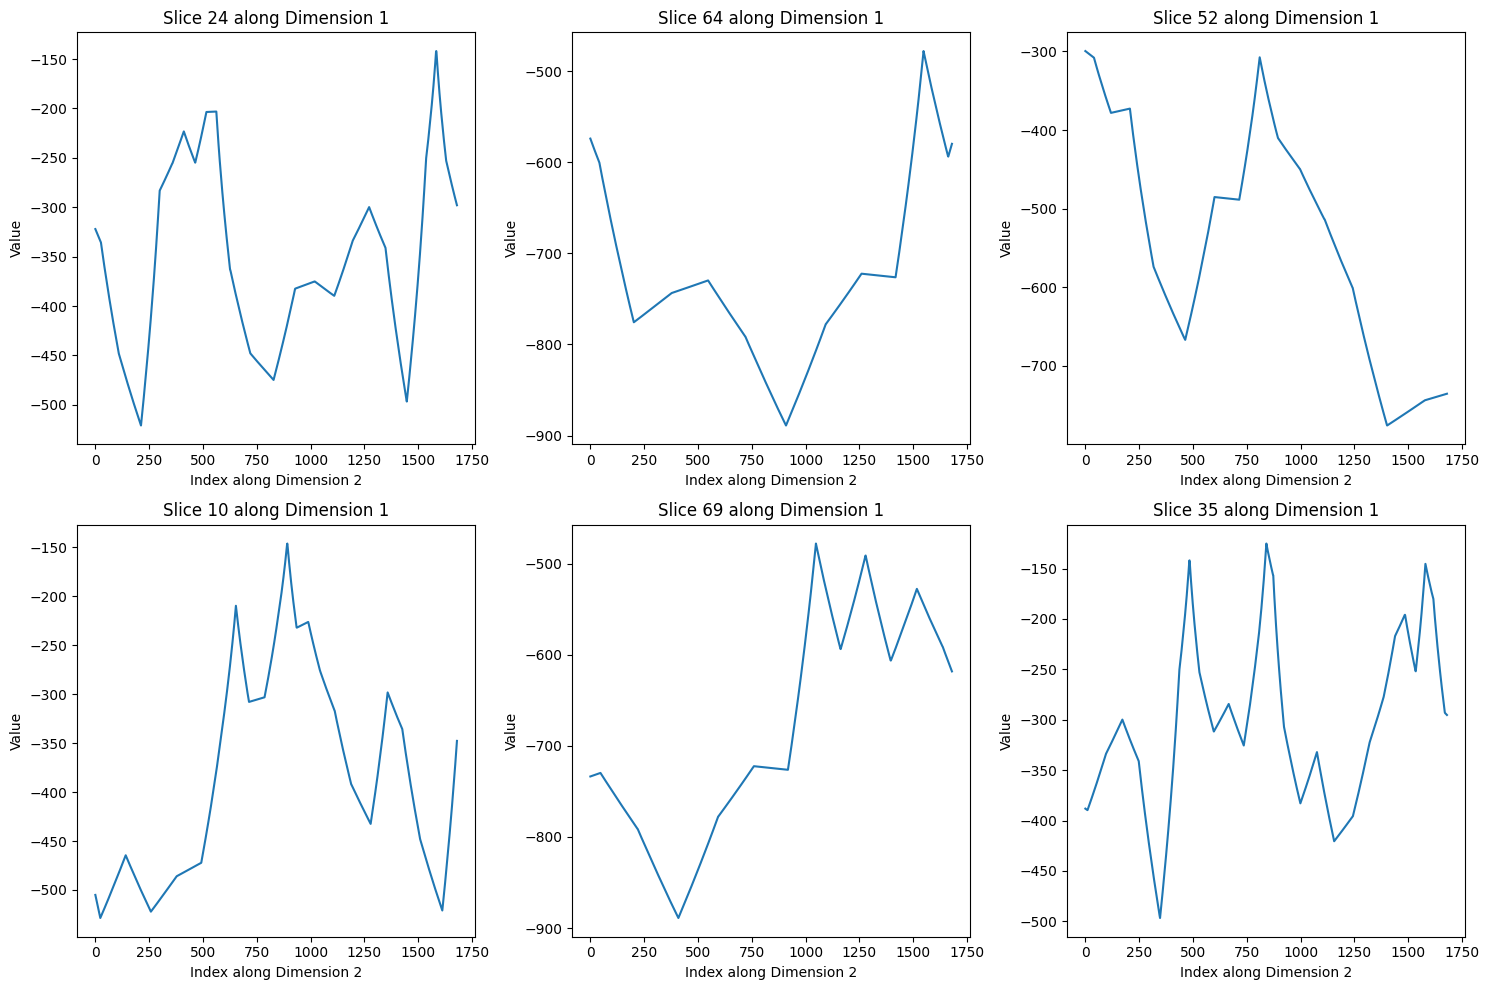

In [22]:
# Assuming your data is a numpy array
random_indices = np.random.choice(range(X.shape[0]), size=6, replace=False)

# Create subplots
fig, axes = plt.subplots(2, 3, figsize=(15, 10))

for i, ax in zip(random_indices, axes.flatten()):
    ax.plot(X[i, :, 0])
    ax.set_title(f'Slice {i} along Dimension 1')
    ax.set_xlabel('Index along Dimension 2')
    ax.set_ylabel('Value')

plt.tight_layout()
plt.show()


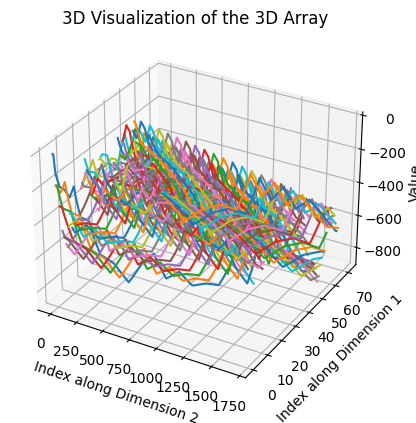

In [23]:
from mpl_toolkits.mplot3d import Axes3D

# Assuming your data is a numpy array
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
x, y = range(X.shape[1]), range(X.shape[0])

for i in range(X.shape[0]):
    ax.plot(x, [i] * X.shape[1], X[i, :, 0])

ax.set_xlabel('Index along Dimension 2')
ax.set_ylabel('Index along Dimension 1')
ax.set_zlabel('Value')
plt.title('3D Visualization of the 3D Array')
plt.show()

In [24]:
# Reshape the data - 1 dimensional feed
print('Shape of Test X =', test.shape)
Test_1D = X.reshape([-1,1681,1])
print('Shape of Input_1D =', X.shape)
print('Shape of X_1D_test =', X_1D_test.shape)

Shape of Test X = (8971, 1)
Shape of Input_1D = (72, 1681, 1)
Shape of X_1D_test = (6069, 1681, 1)


In [25]:
y_test = Classification.model.predict(Test_1D)

190/190 [==============================] - 18s 96ms/step


In [26]:
print(y_test)

[[0.0000000e+00 6.6152883e-26 1.0899058e-35 ... 1.6852802e-20
  9.9999994e-01 0.0000000e+00]
 [0.0000000e+00 2.2875276e-17 6.0837120e-36 ... 1.4106966e-19
  9.9999994e-01 2.3416075e-30]
 [2.3777910e-10 3.1559736e-17 9.9999470e-01 ... 1.2917735e-19
  3.4825784e-18 1.1750661e-18]
 ...
 [0.0000000e+00 0.0000000e+00 0.0000000e+00 ... 1.8159028e-33
  7.2442025e-23 3.5676108e-23]
 [7.4287279e-18 2.7727895e-19 8.0797141e-10 ... 2.5192923e-21
  5.2270396e-19 2.2083756e-12]
 [0.0000000e+00 0.0000000e+00 0.0000000e+00 ... 2.2833889e-30
  5.7598474e-24 5.2487835e-24]]


In [27]:
# Find the largest element in each row
largest_elements = np.max(y_test, axis=1)

# Print the result
print(largest_elements)

[0.99999994 0.99999994 0.9999947  ... 1.         0.99999654 1.        ]


In [28]:
# List of variable names
variable_names = ['X99_normal', 'X111_InnerRace_007', 'X124_Ball_007', 'X137_Outer_007',
                  'X176_InnerRace_014', 'X191_Ball_014', 'X203_Outer_014',
                  'X215_InnerRace_021', 'X228_Ball_021', 'X240_Outer_021']


# Find the largest element and its index in each row for the first 10 rows
largest_elements = np.max(y_test[:10], axis=1)
largest_indices = np.argmax(y_test[:10], axis=1)

# Print the result for the first 10 rows
for i, (largest_element, largest_index) in enumerate(zip(largest_elements, largest_indices)):
    print(f"For row {i + 1}, the largest element is {largest_element} at from {variable_names[largest_index]}")


For row 1, the largest element is 0.9999999403953552 at from X228_Ball_021
For row 2, the largest element is 0.9999999403953552 at from X228_Ball_021
For row 3, the largest element is 0.999994695186615 at from X124_Ball_007
For row 4, the largest element is 0.9999999403953552 at from X137_Outer_007
For row 5, the largest element is 0.9999999403953552 at from X191_Ball_014
For row 6, the largest element is 0.9999999403953552 at from X215_InnerRace_021
For row 7, the largest element is 0.9999999403953552 at from X228_Ball_021
For row 8, the largest element is 0.9997221231460571 at from X203_Outer_014
For row 9, the largest element is 0.9999999403953552 at from X240_Outer_021
For row 10, the largest element is 0.9947307109832764 at from X124_Ball_007


**Smooth Data**

In [29]:
smooth = scipy.io.loadmat('//content/drive/MyDrive/DATA/demo.mat')['data']
print(smooth.shape)

(480894, 1)


In [30]:
import numpy as np

def Sampling(Data, interval_length, samples_per_block):
    # Calculate the number of blocks that can be sampled based on the interval length
    no_of_blocks = (round(len(Data) / interval_length) - round(samples_per_block / interval_length) - 1)
    split_data = np.zeros([no_of_blocks, samples_per_block, 1])
    for i in range(no_of_blocks):
        split_data[i, :, 0] = Data[i * interval_length:(i * interval_length) + samples_per_block].flatten()
    return split_data

def DataPreparation(Data, interval_length, samples_per_block):
    for count, i in enumerate(Data):
        split_data = Sampling(i, interval_length, samples_per_block)
        y = np.zeros([len(split_data), 10])
        y[:, count] = 1
        y1 = np.zeros([len(split_data), 1])
        y1[:, 0] = count
        # Stack up and label the data
        if count == 0:
            X = split_data
            LabelPositional = y
            Label = y1
        else:
            X = np.append(X, split_data, axis=0)
            LabelPositional = np.append(LabelPositional, y, axis=0)
            Label = np.append(Label, y1, axis=0)
    return X, LabelPositional, Label

# Example usage
  # Replace this with your actual data
interval_length = 100
samples_per_block = 1681

X, LabelPositional, Label = DataPreparation([smooth], interval_length, samples_per_block)
print('Shape of Input Data =', X.shape)


Shape of Input Data = (4791, 1681, 1)


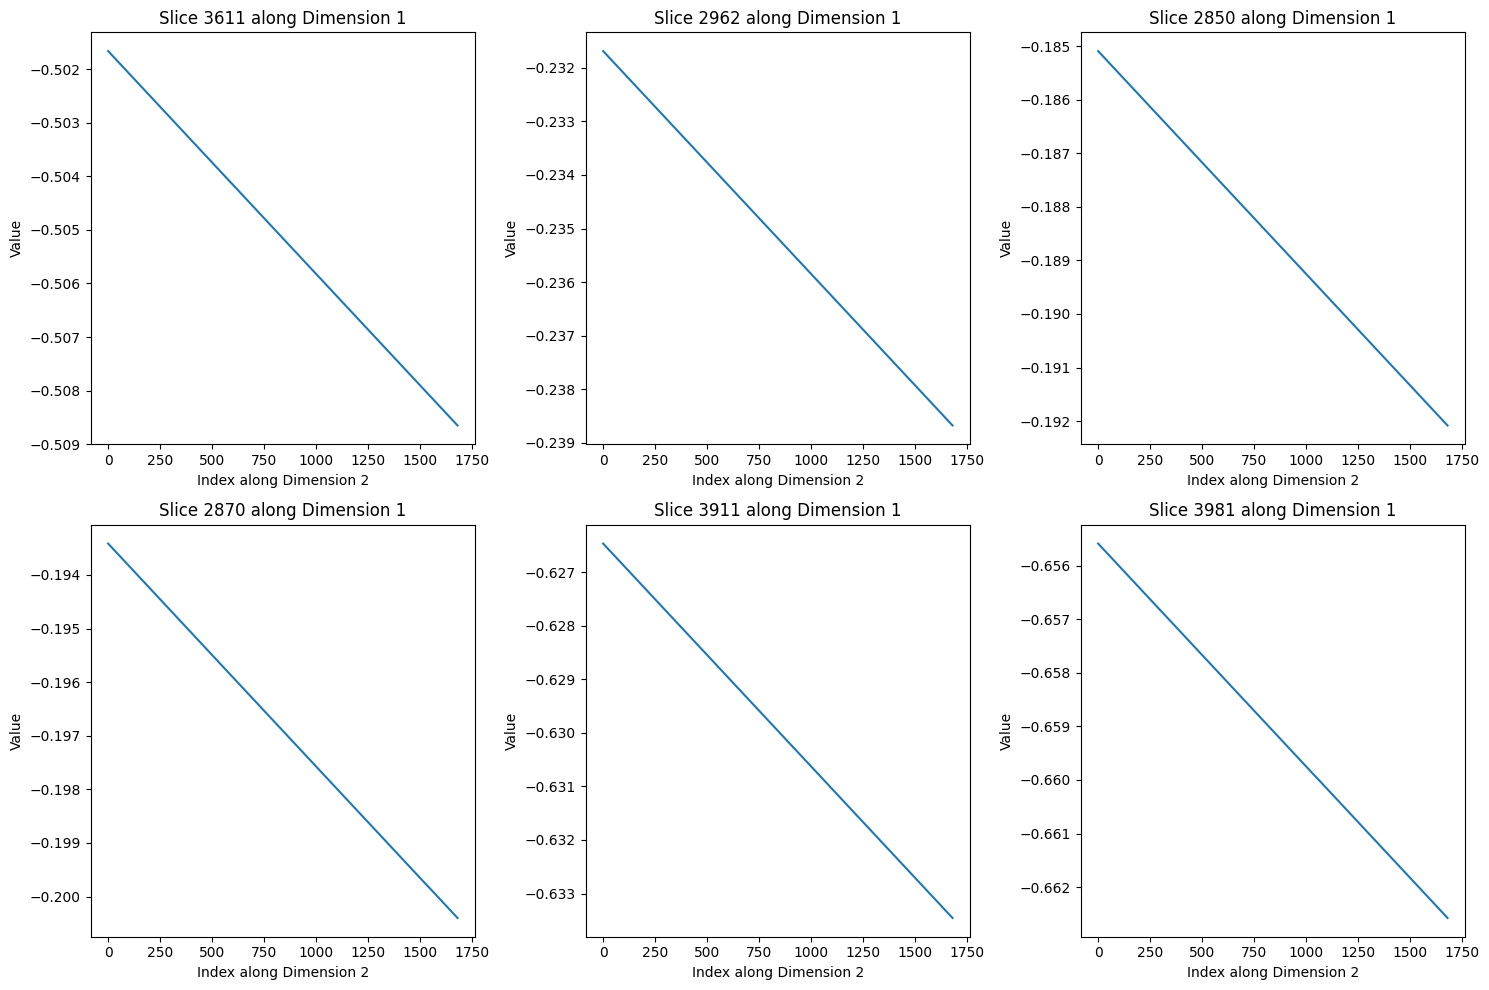

In [31]:
# Assuming your data is a numpy array
random_indices = np.random.choice(range(X.shape[0]), size=6, replace=False)

# Create subplots
fig, axes = plt.subplots(2, 3, figsize=(15, 10))

for i, ax in zip(random_indices, axes.flatten()):
    ax.plot(X[i, :, 0])
    ax.set_title(f'Slice {i} along Dimension 1')
    ax.set_xlabel('Index along Dimension 2')
    ax.set_ylabel('Value')

plt.tight_layout()
plt.show()

**Confirming the Arrays Size**

In [32]:
# Reshape the data - 1 dimensional feed
print('Shape of Test X =', test.shape)
Test_1D = X.reshape([-1,1681,1])
print('Shape of Input_1D =', X.shape)
print('Shape of X_1D_test =', X_1D_test.shape)
print('Shape of y_1D_test =', y_1D_test.shape)


Shape of Test X = (8971, 1)
Shape of Input_1D = (4791, 1681, 1)
Shape of X_1D_test = (6069, 1681, 1)
Shape of y_1D_test = (6069, 10)


In [33]:
y_test = Classification.model.predict(X)


150/150 [==============================] - 16s 105ms/step


In [34]:
print(y_test)


[[0.         0.         0.         ... 0.         0.         0.99999994]
 [0.         0.         0.         ... 0.         0.         0.99999994]
 [0.         0.         0.         ... 0.         0.         0.99999994]
 ...
 [0.         0.         0.         ... 1.         0.         0.        ]
 [0.         0.         0.         ... 1.         0.         0.        ]
 [0.         0.         0.         ... 1.         0.         0.        ]]


In [35]:
# Find the largest element in each row
largest_elements = np.max(y_test, axis=1)

# Print the result
print(largest_elements)

[0.99999994 0.99999994 0.99999994 ... 1.         1.         1.        ]


In [36]:
# List of variable names
variable_names = ['X99_normal', 'X111_InnerRace_007', 'X124_Ball_007', 'X137_Outer_007',
                  'X176_InnerRace_014', 'X191_Ball_014', 'X203_Outer_014',
                  'X215_InnerRace_021', 'X228_Ball_021', 'X240_Outer_021','No Significant Fault']


# Find the largest element and its index in each row for the first 10 rows
largest_elements = np.max(y_test[:20], axis=1)
largest_indices = np.argmax(y_test[:20], axis=1)

# Print the result for the first 10 rows
for i, (largest_element, largest_index) in enumerate(zip(largest_elements, largest_indices)):
  prev = largest_element;
  if prev != largest_element:
    print(f"For row {i + 1}, the largest element is {largest_element} at from {variable_names[largest_index]}")
  else:
    print(f"For row {i + 1}, the largest element is {largest_element} at from {variable_names[10]}")
  prev = largest_element;


For row 1, the largest element is 0.9999999403953552 at from No Significant Fault
For row 2, the largest element is 0.9999999403953552 at from No Significant Fault
For row 3, the largest element is 0.9999999403953552 at from No Significant Fault
For row 4, the largest element is 0.9999999403953552 at from No Significant Fault
For row 5, the largest element is 0.9999999403953552 at from No Significant Fault
For row 6, the largest element is 0.9999999403953552 at from No Significant Fault
For row 7, the largest element is 0.9999999403953552 at from No Significant Fault
For row 8, the largest element is 0.9999999403953552 at from No Significant Fault
For row 9, the largest element is 0.9999999403953552 at from No Significant Fault
For row 10, the largest element is 0.9999999403953552 at from No Significant Fault
For row 11, the largest element is 0.9999999403953552 at from No Significant Fault
For row 12, the largest element is 0.9999999403953552 at from No Significant Fault
For row 13, t